# Entropy Distribution Studies to Determine LU Connectedness

In [1]:
from scipy.stats import unitary_group
from itertools import permutations
import numpy as np
from numpy import linalg as la
from numpy.linalg import eig
import matplotlib.pyplot as plt
import itertools
import math
import cmath
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import random
import array as arr
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes,InsetPosition)

In [2]:
from ipynb.fs.full.The_Non_Linear_Maps_4_Parties import EntVec
from ipynb.fs.full.The_Non_Linear_Maps_4_Parties import UR
from ipynb.fs.full.The_Non_Linear_Maps_4_Parties import UT
from ipynb.fs.full.The_Non_Linear_Maps_4_Parties import UnitaryMatrixQ

In [3]:
def ConjugateTranspose(self):
    return self.conj().T

Function to Generate the Computational Basis Vectors as Column Vectors

In [4]:
def CompB(i,d):
    bv=np.zeros(d)
    bv[i]=1
    bv=bv[...,None]
    return bv

Functions for the Calculation of the Partial Traces

In [5]:
def TraceOutB(rho_AB,d):
    dummyarray=[]
    
    for i in range(d):
        dummyarray.append(np.dot(np.dot(np.kron(np.eye(d),ConjugateTranspose(CompB(i,d))),rho_AB),np.kron(np.eye(d),CompB(i,d))))
    return sum(dummyarray)    

In [6]:
def TraceOutA(rho_AB,d):
    dummyarray=[]
    
    for i in range(d):
        dummyarray.append(np.dot(np.dot(np.kron(ConjugateTranspose(CompB(i,d)),np.eye(d)),rho_AB),np.kron(CompB(i,d),np.eye(d))))
    return sum(dummyarray)  

Von Neumann Entanglement Entropy Calculation Function 

In [7]:
def EntangEnt(psi_AB,d):
    rho_AB=np.dot(psi_AB,ConjugateTranspose(psi_AB))
    rho_A=TraceOutB(rho_AB,d)
    w,v=eig(rho_A)
    w=[np.real(i) for i in w]
    w = [-i*math.log(i,2) for i in w if i>0]
    
    return sum(w)

Haar States Generator

In [8]:
def HaarGen(d):
    HaarState=[]
    for i in range(d):
        HaarState.append(np.random.normal(0,1)+np.random.normal(0,1)*1j)
    HaarState=HaarState/(la.norm(HaarState))
    HaarState=HaarState[...,None]
    return HaarState

## Entanglement Distribution Studies on (4,3)

The $P_9$ Unitary and its Reshaped Versions

In [9]:
P9 =[ 
  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]
]
P9=np.array(P9)

In [10]:
P9R=UR(P9,3)
P9T=UT(P9,3)

The Entanglement Distribution for $P_9$ and its Reshaped Versions

In [11]:
dist_P9=[]
for i in range(10**5):
    dist_P9.append(EntangEnt(np.dot(P9,np.kron(HaarGen(3),HaarGen(3))),3))

In [12]:
dist_P9R=[]
for i in range(10**5):
    dist_P9R.append(EntangEnt(np.dot(P9R,np.kron(HaarGen(3),HaarGen(3))),3))

In [13]:
dist_P9T=[]
for i in range(10**5):
    dist_P9T.append(EntangEnt(np.dot(P9T,np.kron(HaarGen(3),HaarGen(3))),3))

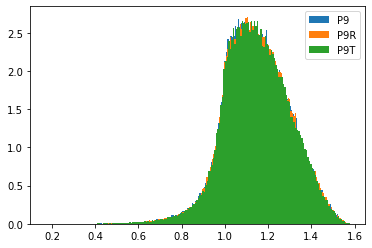

P9 :-  Mean =  1.1476463981909026 Variance =  0.022415289945645386  Max entropy created =  1.571463750040621
P9R:-  Mean =  1.148565216338746 Variance =  0.022424607897372082 Max entropy created =  1.5755579850552301
P9T:-  Mean =  1.1482362499117316  Variance =  0.02245202715128391 Max entropy created =  1.5779485170252894


In [14]:
plt.hist(dist_P9,bins=200,density=True,label='P9')
plt.hist(dist_P9R,bins=200,density=True,label='P9R')
plt.hist(dist_P9T,bins=200,density=True,label='P9T')
plt.legend(loc='upper right')
plt.show()
print("P9 :- ","Mean = ", statistics.mean(dist_P9),"Variance = ",statistics.variance(dist_P9)," Max entropy created = ",max(dist_P9))
print("P9R:- ","Mean = ", statistics.mean(dist_P9R),"Variance = ",statistics.variance(dist_P9R),"Max entropy created = ",max(dist_P9R))
print("P9T:- ","Mean = ", statistics.mean(dist_P9T)," Variance = ",statistics.variance(dist_P9T),"Max entropy created = ",max(dist_P9T))

In [163]:
#Pending : The Kicked Algorithm to prove LU connectedness

## Entanglement Distribution Studies on (4,4)

## The $P_{16}$ Unitary and its Reshaped Versions

In [15]:
P16=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 
  1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
  0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 
  0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 
  0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
  0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 
  0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 
  0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
  0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 
  1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
  0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
P16=np.array(P16)

In [16]:
P16R=UR(P16,4)
P16T=UT(P16,4)

In [17]:
dist_P16=[]
for i in range(10**5):
    dist_P16.append(EntangEnt(np.dot(P16,np.kron(HaarGen(4),HaarGen(4))),4))

In [18]:
dist_P16R=[]
for i in range(10**5):
    dist_P16R.append(EntangEnt(np.dot(P16R,np.kron(HaarGen(4),HaarGen(4))),4))

In [19]:
dist_P16T=[]
for i in range(10**5):
    dist_P16T.append(EntangEnt(np.dot(P16T,np.kron(HaarGen(4),HaarGen(4))),4))

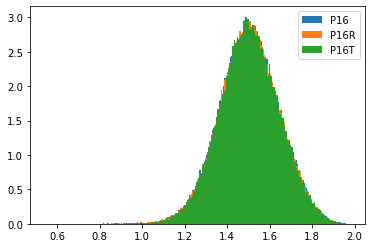

P16 :-  Mean =  1.5045701306516774 Variance =  0.02016939410700611  Max entropy created =  1.9775056267916211
P16R:-  Mean =  1.5042800846384872 Variance =  0.02005995447748294 Max entropy created =  1.9666177998204524
P16T:-  Mean =  1.5035606904805467  Variance =  0.020125574007344695 Max entropy created =  1.964553421677883


In [20]:
plt.hist(dist_P16,bins=200,density=True,label='P16')
plt.hist(dist_P16R,bins=200,density=True,label='P16R')
plt.hist(dist_P16T,bins=200,density=True,label='P16T')
plt.legend(loc='upper right')
plt.show()
print("P16 :- ","Mean = ", statistics.mean(dist_P16),"Variance = ",statistics.variance(dist_P16)," Max entropy created = ",max(dist_P16))
print("P16R:- ","Mean = ", statistics.mean(dist_P16R),"Variance = ",statistics.variance(dist_P16R),"Max entropy created = ",max(dist_P16R))
print("P16T:- ","Mean = ", statistics.mean(dist_P16T)," Variance = ",statistics.variance(dist_P16T),"Max entropy created = ",max(dist_P16T))

In [21]:
import scipy.io
mat2 = scipy.io.loadmat('P100.mat')
P100=mat2['Expression1']
np.shape(P100)

(100, 100)

In [12]:
P100R=UR(P100,10)
P100T=UT(P100,10)

In [14]:
print(EntVec(P100,10))
print(EntVec(P100R,10))
print(EntVec(P100T,10))

(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)


In [61]:
s3=[]
for i in range(10**6):
    s3.append(EntangEnt(np.dot(P100,np.kron(HaarGen(10),HaarGen(10))),10))

In [92]:
s4=[]
for i in range(10**4):
    s4.append(EntangEnt(np.dot(P100R,np.kron(HaarGen(10),HaarGen(10))),10))

In [109]:
s5=[]
for i in range(10**4):
    s5.append(EntangEnt(np.dot(P100T,np.kron(HaarGen(10),HaarGen(10))),10))

In [100]:
UControl=unitary_group.rvs(100)
s6=[]
for i in range(10**4):
    s6.append(EntangEnt(np.dot(UControl,np.kron(HaarGen(10),HaarGen(10))),10))

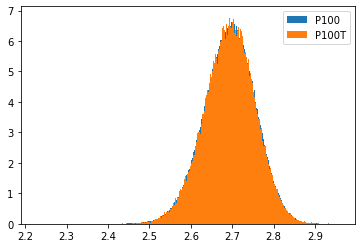

In [63]:
plt.hist(s3,bins=400,density=True,label='P100')
plt.hist(s7,bins=400,density=True,label='P100T')
plt.legend(loc='upper right')
plt.show()

In [111]:
print((statistics.mean(s3)-statistics.mean(s5))/statistics.mean(s3))
print((statistics.variance(s3)-statistics.variance(s5))/statistics.variance(s3))
print((statistics.mean(s3)-statistics.mean(s4))/statistics.mean(s3))
print((statistics.variance(s3)-statistics.variance(s4))/statistics.variance(s3))

0.00021875539499248864
-0.00680179196587608
0.00016523121197455225
-0.07059249246064159


In [38]:
print(statistics.mean(s3),statistics.variance(s3),statistics.mean(s7),statistics.variance(s7))

2.6927771581078472 0.003855180963804201 2.693996788810047 0.003846523612019522


In [54]:
def Complex2UnitaryPerturber(U,N):
    v=[cmath.exp(1j*random.random()*2*math.pi) for i in range(N)]
    D=np.diag(v)
    return D@U

In [59]:
U_Test=[]
flag=False
s7=[]
for i in range(1):
    U_Test=Real2UnitaryPerturber(P100,100)
    for j in range(10**5):
        s7.append(EntangEnt(np.dot(U_Test,np.kron(HaarGen(10),HaarGen(10))),10))
    if(not (math.isclose(statistics.mean(s3),statistics.mean(s7),abs_tol=10**-2) and math.isclose(statistics.variance(s3),statistics.variance(s7),abs_tol=10**-2))):
        flag=True
        break
print(flag)

False
